# Proyecto final curso Data Science CoderHouse - com. 18340

## Presentación de la Empresa **Ipx Tools** (nombre inventado)

### Ipx Tools es una empresa fundada en 2013, orientada a la comercialización de bombas de agua, máquinas y herramientas para uso doméstico, comercial e industrial.

Ipx Tools cuenta con la representación de varias marcars del sector y está en constante crecimiento

La empresa cuenta con un equipo de venta y postventa especializado en el rubro como principal fuerza de venta, además cuana con un sitio ecommerce B2B que está en desarrollo.

### Objetivos a resolver.

Para una correcta planificación de campañas de venta, es necesario clasificar a los clientes en distintas categorías, esto hoy se hace manualmente, pero al estar en constante crecimiento, se hace muy dificil confiar en los criterios y muchas veces se dejam clientes sin clasificar, lo que distorciona todoas las mediciones.

Por otro lado, una tara que es realmente problemática y que también genera desconfiazo en lo fidedigna, es la creación del forecaste de ventas anual, que hoy en día se hace en función del histórico de ventas, pero sería interesante poder predecir las ventas, inclusive de clientes con poca historia o aunque sea se r más precisos con los clientes que si la tienen.

## Preguntas y objetivos de la investigación

Para poder responder a los problemas a resolver, surgen las siguientes preguntas a responder:
- Es posible clasificar a los clientes con la infromnación guardada en el ERP?
- Teniendo en cuenta el histórico de ventas, se puede predecir la cantidad de productos que va a comprar en el futuro?
- Existe alguna relación entre los vendedores y la cantiad de ventas? se puede prescindir de los vendedores y pasar a un esquema online?
- Haría falta más información para que sea más predecible el comportamiento
- La clasificación actual de clientes es adecuada o convendría clasificarlos con otro criterio?

## Conformación del Equipo de tranajo

### Alumnos
- Adrián Leon
- Agustina Lencina
- Agustín Oliva
- Aldo Sanchez

### Tutor
- Joaquin Aranguren

## Fuente de Datos y criterios de selección (Data Acquisition)

Los datos son extraídos básicamente de los maestros de clientes y productos y del histórico de ventas (facturas y notas de crédito)

En principio se tomaron las ventas del 01/01/2020 al 09/03/2022, fecha en la que se hizo la extracción. 

No se descarta que esta selección varíe en función de los futuros análisis y resultados

## Data Wrangling y EDA, Univariado, Bivariado y Multivariado

### Data Wrangling

Importar las librerías

In [14]:
#DESHABILITO LOS WARNINIGS
import warnings
warnings.filterwarnings('ignore')

#Datos
import pandas as pd
import numpy as np
import pandas_profiling

# Visualizacion de Datos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# esta línea se agrega para que imprima los gráficos dentro del notebook
%matplotlib inline  
#pip install funpymodeling
from funpymodeling.exploratory import profiling_num
from funpymodeling.exploratory import freq_tbl
#Modelos
import scipy.cluster.hierarchy as shc

Importar el archivo csv

In [3]:
#Completar
df_ventas = pd.read_csv('./files/HistoricoVentas.csv', sep=';')
df_ventas.head()

,DS_CODZON,CODCOM,FCHMOV,NROCTA,DS_NROCTA,CLASIF,REGION,ZONAR,DS_VNDDOR,CANTID,IMPORT,PCTBFN,TIPPRO,ARTCOD,DS_ARTCOD,CANAL,REPRES,NEGOCI,SEGMEN,SUBSEG
0,GBA Sur,NC0000,2020-01-02 00:00:00.000,I00794,SILVA IMPORTACIONES S.A.,Cliente C (resto de los clientes),GBA,GBASUR,Juan Jose Gutemberg,-1.0,-6802.29,0.0,PT,VTI01350M,"(NO USAR, DISCONTINUADO) Taladro inalambrico 1...",HERRAMIENTAS ELECTRICAS,TOTAL,HERRAMIENTAS,INALAMBRICAS,18V
1,PATAGONIA (Neuquen/Rio Negro/Chubut/Santa Cruz...,NC0000,2020-01-02 00:00:00.000,I00631,SEPULVEDA JUAN MANUEL,Cliente C (resto de los clientes),NEUQUEN,NEUQUEN,Martin Mere,-12.0,-1884.02,0.0,PT,XAR030300,Acople rapido 1/2`` para riego TOTAL THWS030301,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Poda
2,GBA Norte,NC0000,2020-01-03 00:00:00.000,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-1.0,-1310.52,0.0,PT,XLS003700,Llave Sueca 1-1/2´´ TOTAL THT172151,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves de Caño
3,GBA Norte,NC0000,2020-01-03 00:00:00.000,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,-899.01,0.0,PT,XTQI01580,Llave cricket158mm INDUSTRIAL TOTAL THT106146,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves
4,GBA Norte,NC0000,2020-01-03 00:00:00.000,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,-1479.87,0.0,PT,XTQI02600,Llave cricket 260mm INDUSTRIAL TOTAL THT106126,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Bocallaves y accesorios


In [4]:
#Shape del dataframe
df_ventas.shape

(127918, 20)

In [5]:
#Tipos de datos que componen el df_ventas
df_ventas.dtypes

DS_CODZON     object
CODCOM        object
FCHMOV        object
NROCTA        object
DS_NROCTA     object
CLASIF        object
REGION        object
ZONAR         object
DS_VNDDOR     object
CANTID       float64
IMPORT       float64
PCTBFN       float64
TIPPRO        object
ARTCOD        object
DS_ARTCOD     object
CANAL         object
REPRES        object
NEGOCI        object
SEGMEN        object
SUBSEG        object
dtype: object

In [6]:
#Total de registros por columnas
df_ventas.count()

DS_CODZON    127918
CODCOM       127918
FCHMOV       127918
NROCTA       127918
DS_NROCTA    127918
CLASIF       123739
REGION       127918
ZONAR        127918
DS_VNDDOR    127918
CANTID       127918
IMPORT       127918
PCTBFN       127918
TIPPRO       127918
ARTCOD       127918
DS_ARTCOD    127918
CANAL        126527
REPRES       127918
NEGOCI       127918
SEGMEN       127918
SUBSEG       127918
dtype: int64

In [7]:
#Informacion de la estructura de df_ventas
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127918 entries, 0 to 127917
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DS_CODZON  127918 non-null  object 
 1   CODCOM     127918 non-null  object 
 2   FCHMOV     127918 non-null  object 
 3   NROCTA     127918 non-null  object 
 4   DS_NROCTA  127918 non-null  object 
 5   CLASIF     123739 non-null  object 
 6   REGION     127918 non-null  object 
 7   ZONAR      127918 non-null  object 
 8   DS_VNDDOR  127918 non-null  object 
 9   CANTID     127918 non-null  float64
 10  IMPORT     127918 non-null  float64
 11  PCTBFN     127918 non-null  float64
 12  TIPPRO     127918 non-null  object 
 13  ARTCOD     127918 non-null  object 
 14  DS_ARTCOD  127918 non-null  object 
 15  CANAL      126527 non-null  object 
 16  REPRES     127918 non-null  object 
 17  NEGOCI     127918 non-null  object 
 18  SEGMEN     127918 non-null  object 
 19  SUBSEG     127918 non-n

In [4]:
df_ventas['FCHMOV'] = pd.to_datetime(df_ventas['FCHMOV']) #Se convierte columna de fecha de movimiento a fecha
df_ventas.dtypes

DS_CODZON            object
CODCOM               object
FCHMOV       datetime64[ns]
NROCTA               object
DS_NROCTA            object
CLASIF               object
REGION               object
ZONAR                object
DS_VNDDOR            object
CANTID              float64
IMPORT              float64
PCTBFN              float64
TIPPRO               object
ARTCOD               object
DS_ARTCOD            object
CANAL                object
REPRES               object
NEGOCI               object
SEGMEN               object
SUBSEG               object
dtype: object

In [5]:
#Generar dos columnas de periodo (Año y Mes) a partir de la fecha de venta
df_ventas['Anio'] = df_ventas['FCHMOV'].dt.year 
df_ventas['Mes'] = df_ventas['FCHMOV'].dt.month
df_ventas['Periodo'] = pd.to_numeric(df_ventas["Anio"].apply(str) + df_ventas["Mes"].apply(str))
#Generar columna precio
df_ventas['PRECIO'] = np.round(df_ventas['IMPORT']/df_ventas['CANTID'], decimals = 2) 
df_ventas.head()

,DS_CODZON,CODCOM,FCHMOV,NROCTA,DS_NROCTA,CLASIF,REGION,ZONAR,DS_VNDDOR,CANTID,...,DS_ARTCOD,CANAL,REPRES,NEGOCI,SEGMEN,SUBSEG,Anio,Mes,Periodo,PRECIO
0,GBA Sur,NC0000,2020-01-02,I00794,SILVA IMPORTACIONES S.A.,Cliente C (resto de los clientes),GBA,GBASUR,Juan Jose Gutemberg,-1.0,...,"(NO USAR, DISCONTINUADO) Taladro inalambrico 1...",HERRAMIENTAS ELECTRICAS,TOTAL,HERRAMIENTAS,INALAMBRICAS,18V,2020,1,20201,6802.29
1,PATAGONIA (Neuquen/Rio Negro/Chubut/Santa Cruz...,NC0000,2020-01-02,I00631,SEPULVEDA JUAN MANUEL,Cliente C (resto de los clientes),NEUQUEN,NEUQUEN,Martin Mere,-12.0,...,Acople rapido 1/2`` para riego TOTAL THWS030301,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Poda,2020,1,20201,157.00
2,GBA Norte,NC0000,2020-01-03,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-1.0,...,Llave Sueca 1-1/2´´ TOTAL THT172151,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves de Caño,2020,1,20201,1310.52
3,GBA Norte,NC0000,2020-01-03,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,...,Llave cricket158mm INDUSTRIAL TOTAL THT106146,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves,2020,1,20201,449.50
4,GBA Norte,NC0000,2020-01-03,I01101,DECKER DIEGO ROBERTO,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,...,Llave cricket 260mm INDUSTRIAL TOTAL THT106126,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Bocallaves y accesorios,2020,1,20201,739.94


In [6]:
#Eliminar la columna nombre del Cliente y PCTBFN
df_ventas = df_ventas.drop(columns=['DS_NROCTA'])
## df_ventas = df_ventas.drop(columns=['PCTBFN']) no la eliminaría en principio por si hay una relación entre el % de descuento aplicado y la cantidad comprada
df_ventas.head()

,DS_CODZON,CODCOM,FCHMOV,NROCTA,CLASIF,REGION,ZONAR,DS_VNDDOR,CANTID,IMPORT,...,DS_ARTCOD,CANAL,REPRES,NEGOCI,SEGMEN,SUBSEG,Anio,Mes,Periodo,PRECIO
0,GBA Sur,NC0000,2020-01-02,I00794,Cliente C (resto de los clientes),GBA,GBASUR,Juan Jose Gutemberg,-1.0,-6802.29,...,"(NO USAR, DISCONTINUADO) Taladro inalambrico 1...",HERRAMIENTAS ELECTRICAS,TOTAL,HERRAMIENTAS,INALAMBRICAS,18V,2020,1,20201,6802.29
1,PATAGONIA (Neuquen/Rio Negro/Chubut/Santa Cruz...,NC0000,2020-01-02,I00631,Cliente C (resto de los clientes),NEUQUEN,NEUQUEN,Martin Mere,-12.0,-1884.02,...,Acople rapido 1/2`` para riego TOTAL THWS030301,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Poda,2020,1,20201,157.00
2,GBA Norte,NC0000,2020-01-03,I01101,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-1.0,-1310.52,...,Llave Sueca 1-1/2´´ TOTAL THT172151,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves de Caño,2020,1,20201,1310.52
3,GBA Norte,NC0000,2020-01-03,I01101,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,-899.01,...,Llave cricket158mm INDUSTRIAL TOTAL THT106146,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Llaves,2020,1,20201,449.50
4,GBA Norte,NC0000,2020-01-03,I01101,Cliente C (resto de los clientes),GBA,GBANOR,CARLOS MICELI,-2.0,-1479.87,...,Llave cricket 260mm INDUSTRIAL TOTAL THT106126,HERRAMIENTAS MANUALES,TOTAL,HERRAMIENTAS,MANUALES,Bocallaves y accesorios,2020,1,20201,739.94


In [11]:
#Creacion de tablas auxiliares para convertir variables categoricas en numericas"
#Regiones
region = df_ventas['REGION'].unique()
df_region = pd.DataFrame(region, columns= ["Region"])
df_region.head()

,Region
0,GBA
1,NEUQUEN
2,BSAS
3,CABA
4,STAFE


In [12]:
#Zonas
zona = df_ventas['ZONAR'].unique()
df_zona = pd.DataFrame(zona, columns= ["Zona"])
df_zona.head()

,Zona
0,GBASUR
1,NEUQUEN
2,GBANOR
3,BSASCO
4,CABA1


In [13]:
#Canales
canal = df_ventas['CANAL'].unique()
df_canal = pd.DataFrame(canal, columns= ["Canal"])
df_canal.head()

,Canal
0,HERRAMIENTAS ELECTRICAS
1,HERRAMIENTAS MANUALES
2,BOMBAS INDUSTRIALES
3,BOMBAS DOMESTICAS
4,MAQUINAS


In [14]:
#Negocios
negocio = df_ventas['NEGOCI'].unique()
df_negocio = pd.DataFrame(negocio, columns= ["Negocio"])
df_negocio.head()

,Negocio
0,HERRAMIENTAS
1,BOMBAS
2,MAQUINAS
3,NADA
4,KLUGAN


In [15]:
#Segmentos
segmento = df_ventas['SEGMEN'].unique()
df_segmento = pd.DataFrame(segmento, columns= ["Segmento"])
df_segmento.head()

,Segmento
0,INALAMBRICAS
1,MANUALES
2,ELECTRICAS
3,NEUMATICAS
4,SUMERGIBLE


In [16]:
#Subsegmentos
#subsegm = df_ventas(['SEGMEN'])
#df_subsegm = pd.DataFrame(subsegm, columns= ["Segmento"])
#df_subsegm.head()

grouped = df_ventas.groupby(['SEGMEN','SUBSEG']) 
grouped 
#df_subsegm = pd.DataFrame(grouped)#, columns= ["Segmento"])
#df_subsegm.head(10)

#subsegmento=np.unique(df_ventas[['SEGMEN','SUBSEG']])

#subsegmento = df_ventas['SUBSEG'].unique()
#df_subsegm = pd.DataFrame(subsegmento, columns= ["Segmento","Subsegmento"])
#df_subsegm.head(10)

In [17]:
#df_ventas_num = df_ventas(['CANTID','IMPORT','PRECIO'])
df_ventas_num = df_ventas.select_dtypes(include=[np.number])
df_ventas_num = df_ventas_num.drop(columns=['Anio','Mes'])
df_ventas_num.head()

,CANTID,IMPORT,PCTBFN,PRECIO
0,-1.0,-6802.29,0.0,6802.29
1,-12.0,-1884.02,0.0,157.00
2,-1.0,-1310.52,0.0,1310.52
3,-2.0,-899.01,0.0,449.50
4,-2.0,-1479.87,0.0,739.94


#Análisis univariado

In [18]:
#Principales medidas estadisticas
#Se ejecuta este metodo a modo de ejemplo debi a que la mayoria de los valores de columnas referencian
#por codigo a descripciones que se encuentran referenciados en otras tablas
df_ventas_num.describe().T

,count,mean,std,min,25%,50%,75%,max
CANTID,127918.0,8.190302,31.030810,-2.400000e+03,2.000,4.000,10.000,4000.0
IMPORT,127918.0,19203.371989,56820.481891,-4.620900e+06,3370.800,8204.595,20103.380,4620900.0
PCTBFN,127918.0,-44.873293,14.610571,-7.227978e+01,-52.615,-50.000,-41.500,33.0
PRECIO,127918.0,5035.115044,8344.651297,-1.637384e+05,588.300,2735.830,6843.735,668115.9


### Generar 3 gráficos asociados

Analisis de las ventas por Zona y Region

<AxesSubplot:>

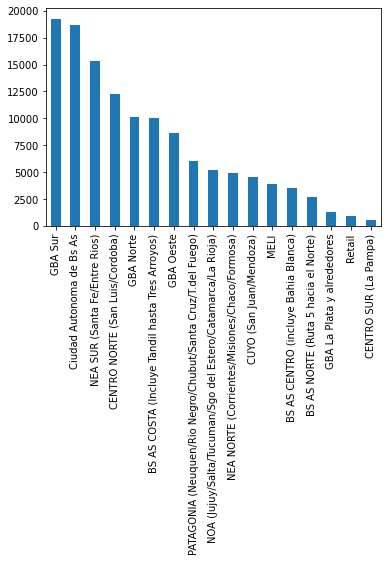

In [19]:
#Cantidad de ventas por zonas
df_ventas['DS_CODZON'].value_counts().plot.bar()
#OBSERVACIONES: La Zona de Santa Fe/Entre Ríos tiene mas incidencia en las ventas que San Luis/Córdoba. 
#Mientras que en la zona de gran Bs As es la zona GBA Sur que tiene una mayor venta a la zona GBA Norte y GBA Oeste.

<AxesSubplot:>

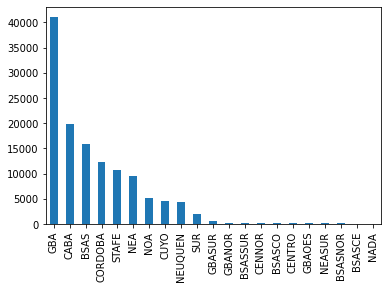

In [20]:
#Cantidad de ventas por region
df_ventas['REGION'].value_counts().plot.bar()

Analisis temporal de las ventas

In [ ]:
#Cuales son los dias en que ocurren mas casos?
#Obtener el dia de la semana como una columna nueva del dataframe
#df_ventas['Day_Week'] = df_ventas['FCHMOV'].dt.dayofweek
#df_ventas['Day_Week_Text'] = df_ventas['FCHMOV'].dt.day_name()
#df_ventas.head()

<AxesSubplot:>

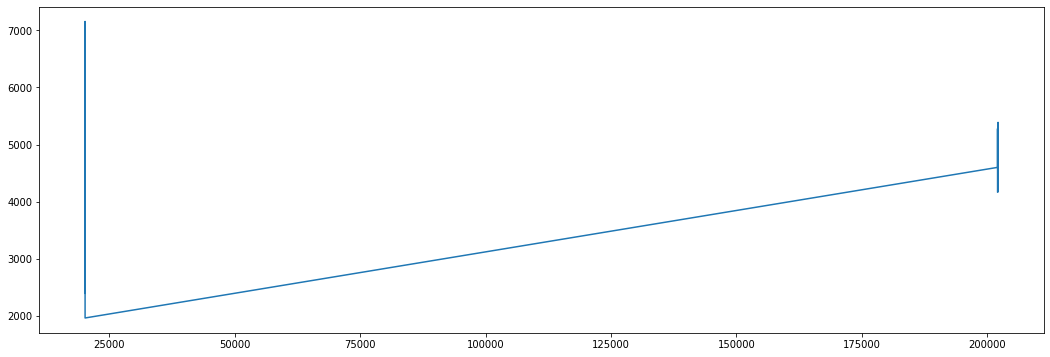

In [31]:
df_ventas['Periodo'].value_counts().sort_index().plot.line(figsize=(18,6))

Analisis de cantidad de ventas por vendedor

<AxesSubplot:>

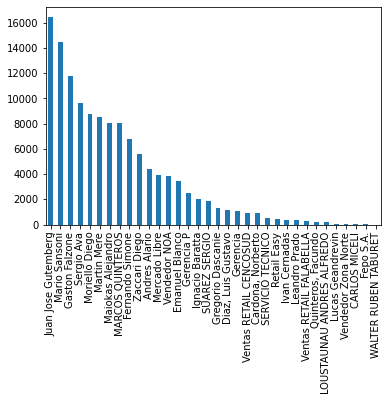

In [22]:
df_ventas['DS_VNDDOR'].value_counts().plot.bar()

<AxesSubplot:ylabel='Anio'>

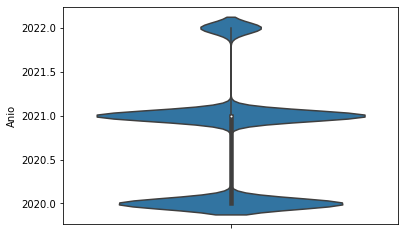

In [36]:
from seaborn import violinplot
violinplot(y=df_ventas.Anio, data=df_ventas , orient="v")

### Distribucion de Frecuencias
Calcular la frecuencia absoluta, la absoluta acumulada, la frecuencia relativa y relativa acumulada para la variable: CLASIF

In [ ]:
#Frecuencia absoluta
df_frec = pd.DataFrame(df_ventas['CLASIF'].value_counts())
df_frec.rename(columns={'CLASIF':'Frec_absoluta'}, inplace=True)
df_frec

,Frec_absoluta
Cliente C (resto de los clientes),100052
Cliente premium AAA (25 primeros clientes - Cta Cte perfecta - No Entes Gub. - Lideres en su zona - No creancompetencia),8471
Cliente A ( 50 segundos clientes - Cta Cte perfecta ),7094
Cliente B ( 100 terceros clientes ),6484
Retail,1637
Cliente INACTIVO en el ultimo año calendario,1


In [ ]:
#Frecuencia relativa
df_frec["Frec_rel_%"] = 100 * df_frec["Frec_absoluta"]/len(df_ventas['CLASIF'])
df_frec

,Frec_absoluta,Frec_rel_%
Cliente C (resto de los clientes),100052,78.215732
Cliente premium AAA (25 primeros clientes - Cta Cte perfecta - No Entes Gub. - Lideres en su zona - No creancompetencia),8471,6.622211
Cliente A ( 50 segundos clientes - Cta Cte perfecta ),7094,5.545740
Cliente B ( 100 terceros clientes ),6484,5.068872
Retail,1637,1.279726
Cliente INACTIVO en el ultimo año calendario,1,0.000782


In [ ]:
#Creo una función para calcular los acumulados
def acum(df, col, colAcum):
  values = df[col].values
  val_acum = []
  acumul = 0
  for i in values:
    acumul = acumul + i
    val_acum.append(acumul)
  df[colAcum] = val_acum
  
#Se aplica la funcion:
acum(df_frec, 'Frec_absoluta', 'Frec_absoluta_Acum')
acum(df_frec, 'Frec_rel_%', 'Frec_rel_%_Acum')
df_frec

,Frec_absoluta,Frec_rel_%,Frec_absoluta_Acum,Frec_rel_%_Acum
Cliente C (resto de los clientes),100052,78.215732,100052,78.215732
Cliente premium AAA (25 primeros clientes - Cta Cte perfecta - No Entes Gub. - Lideres en su zona - No creancompetencia),8471,6.622211,108523,84.837943
Cliente A ( 50 segundos clientes - Cta Cte perfecta ),7094,5.545740,115617,90.383683
Cliente B ( 100 terceros clientes ),6484,5.068872,122101,95.452556
Retail,1637,1.279726,123738,96.732282
Cliente INACTIVO en el ultimo año calendario,1,0.000782,123739,96.733063


### Análisis Bivariado

In [50]:
# creo un df del acumulado de operaciones por cliente

df_clientes = freq_tbl(df_ventas[["NROCTA"]])
# pd.set_option('display.max_rows', None)  #queda comentado para que no pese tanto el notebook
df_clientes

,NROCTA,frequency,percentage,cumulative_perc
0,I00000,3939,0.030793,0.030793
1,I00757,3073,0.024023,0.054816
2,I00780,2481,0.019395,0.074212
3,I00999,2438,0.019059,0.093271
4,I00605,2308,0.018043,0.111313
...,...,...,...,...
1281,I00802,1,0.000008,0.999969
1282,I00774,1,0.000008,0.999977
1283,IU0067,1,0.000008,0.999984
1284,I01713,1,0.000008,0.999992


In [ ]:
pd.set_option('display.max_rows', 10)

In [39]:
# filtro los 15 clientes con mas operaciones.

df_clientes_filtrado = df_clientes[df_clientes["cumulative_perc"] <0.24]

In [40]:
# filtro del df original para quedarme solo con los 15 clientes

df_ventas_filtroclientes = df_ventas[df_ventas["NROCTA"].isin(df_clientes_filtrado["NROCTA"])]

In [41]:
# veo la dimension del nuevo df. El anterior tenia 130mil registros y este 30.300

df_ventas_filtroclientes.shape

(30299, 23)

In [42]:
# renombro algunas columnas para que se facilite el trabajo

df_ventas_filtroclientes = df_ventas_filtroclientes.rename(columns={"DS_CODZON":"Zona", "NROCTA":"Cliente", "CANTID":"Cantidad", "DS_ARTCOD	":"Articulo", "NEGOCI":"Negocio", "SEGMEN":"Segmento", "SUBSEG":"Subsegmento", "IMPORT":"Importe" })

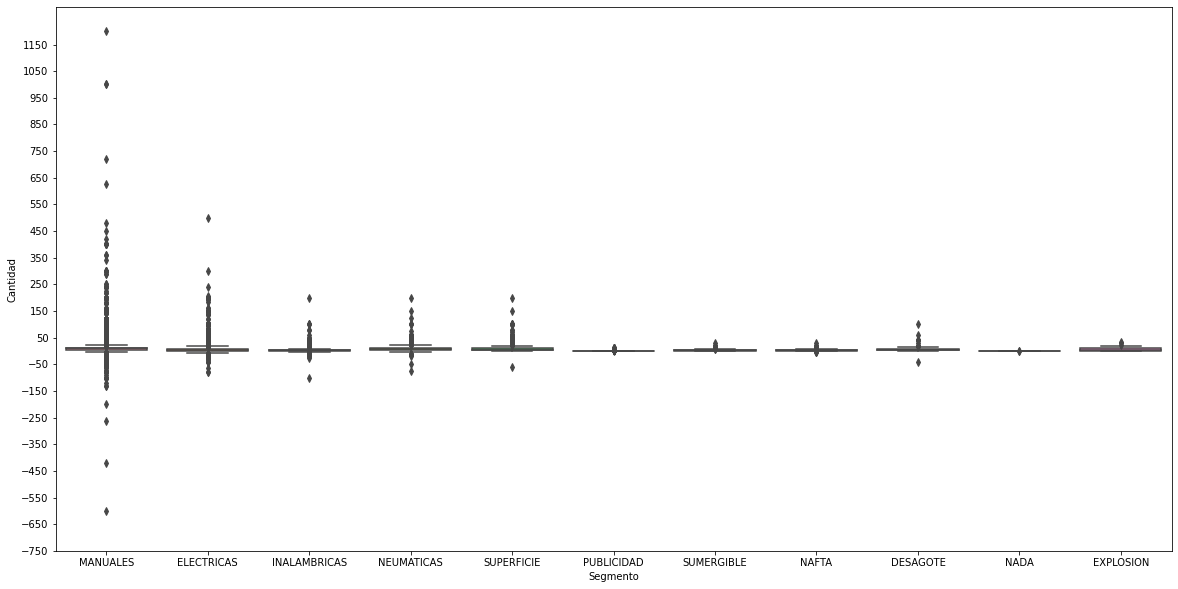

In [43]:
# grafico un boxplot para ver los outliers que tengo. Se observa que hay una gran cantidad de operaciones con la variable CANTIDAD muy alta. Esto distorciona el analisis por lo que se decide quedarse con las operaciones con cantidad menor a 50 y mayor a -50

plt.figure(figsize=(20,10))
sns.boxplot(df_ventas_filtroclientes["Segmento"], df_ventas_filtroclientes["Cantidad"])
plt.yticks(np.arange(-750,1250,100))
plt.show()

In [44]:
# filtro el dataset para quedarme solo con las operaciones cuya cantidad sea menor a 50 y mayor a -50

df_ventas_filtroclientes_filtrocantidades = df_ventas_filtroclientes[  (df_ventas_filtroclientes["Cantidad"] <50 ) & (df_ventas_filtroclientes["Cantidad"] >-50 )]

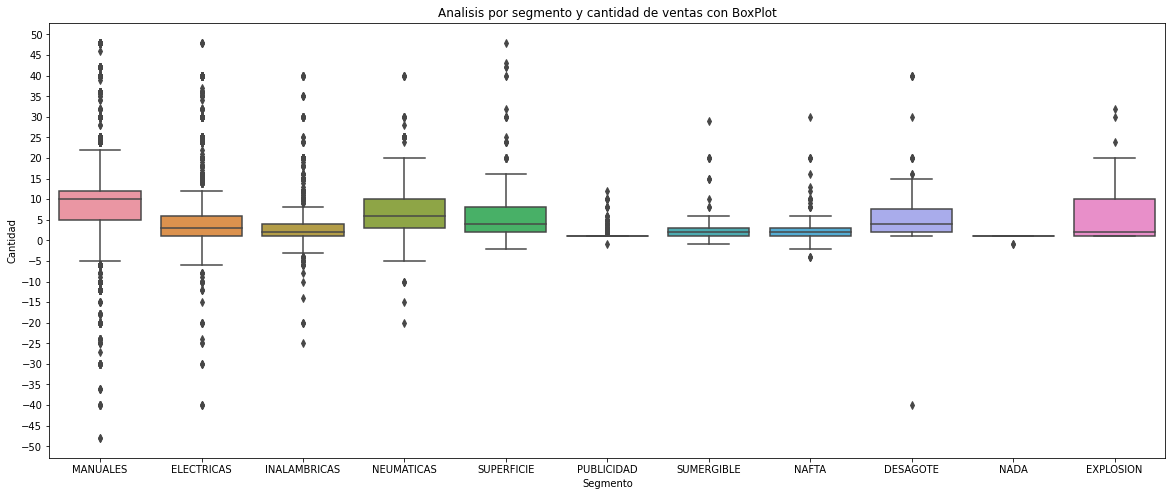

In [45]:
# observo la distribucion y los datos anomalos para cada segmento. Se siguen observando outliers. Deberiamos decidir si los vamos a suprimir o como lo vamos a trabajar

plt.figure(figsize=(20,8))
sns.boxplot(df_ventas_filtroclientes_filtrocantidades["Segmento"], df_ventas_filtroclientes_filtrocantidades["Cantidad"])
plt.yticks(np.arange(-50,51,5))
plt.title("Analisis por segmento y cantidad de ventas con BoxPlot")
plt.show()

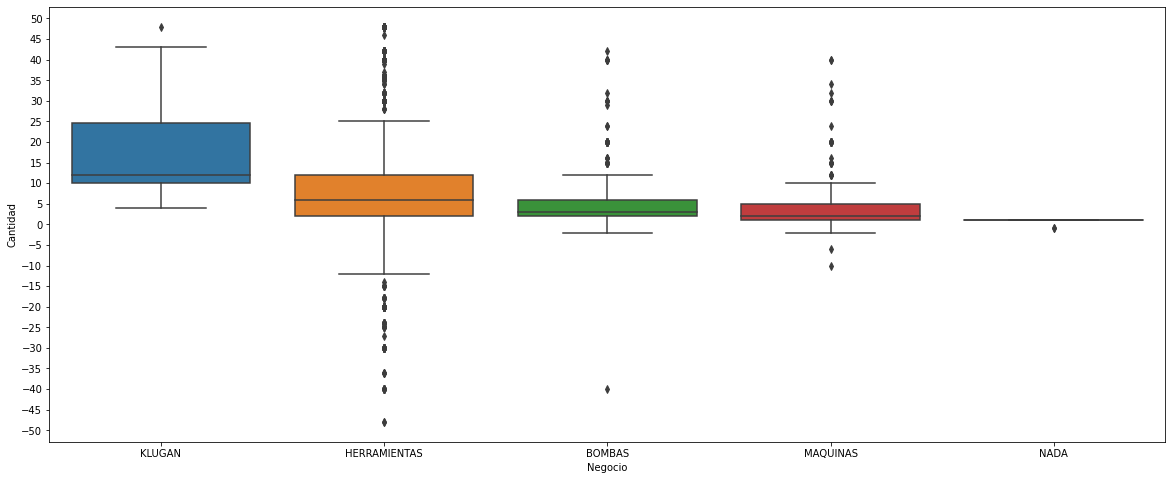

In [46]:
# observo la distribucion y los datos anomalos para cada negocio. Deberiamos decidir si los vamos a suprimir o como lo vamos a trabajar
plt.figure(figsize=(20,8))
sns.boxplot(df_ventas_filtroclientes_filtrocantidades["Negocio"], df_ventas_filtroclientes_filtrocantidades["Cantidad"], order=["KLUGAN","HERRAMIENTAS", "BOMBAS", "MAQUINAS", "NADA"])
plt.yticks(np.arange(-50,51,5))
plt.show()

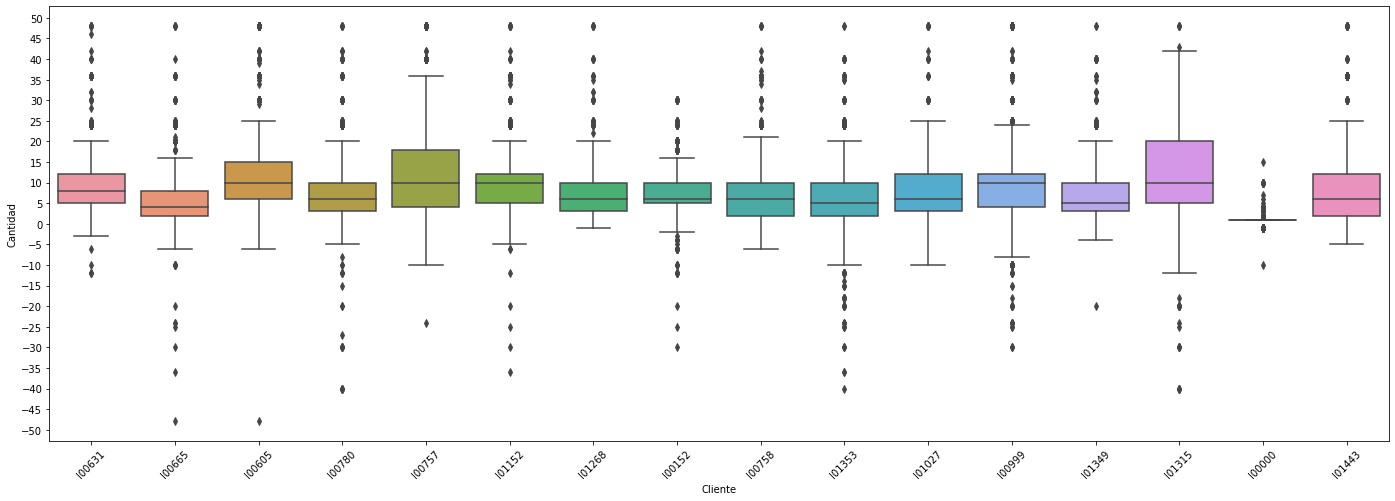

In [47]:
# observo la distribucion y los datos anomalos para cada cliente. Deberiamos decidir si los vamos a suprimir o como lo vamos a trabajar

plt.figure(figsize=(24,8))
sns.boxplot(df_ventas_filtroclientes_filtrocantidades["Cliente"], df_ventas_filtroclientes_filtrocantidades["Cantidad"])
plt.yticks(np.arange(-50,51,5))
plt.xticks(rotation=45)
plt.show()

In [48]:
# se observa que el negocio de las herramientas es por lejos el que mas productos vende

df_ventas_filtroclientes_filtrocantidades.groupby("Negocio")["Cantidad"].sum().sort_values(ascending=False)

Negocio
HERRAMIENTAS    234908.0
BOMBAS            2693.0
MAQUINAS          1138.0
KLUGAN             512.0
NADA                34.0
Name: Cantidad, dtype: float64

In [49]:
# analizando por importe, se observa que el negocio Klugan,bombas y maquinas son los que en promedio mas ingresos generan
df_ventas_filtroclientes_filtrocantidades.groupby("Negocio")["Importe"].mean().sort_values(ascending=False)

Negocio
KLUGAN          91868.175556
BOMBAS          42820.768223
MAQUINAS        40448.220766
HERRAMIENTAS    13703.219130
NADA             1568.347368
Name: Importe, dtype: float64

## Clasificación de clientes
### Primero vamos a codificar las variables categóricas

In [19]:
df_ventas.columns

Index(['DS_CODZON', 'CODCOM', 'FCHMOV', 'NROCTA', 'CLASIF', 'REGION', 'ZONAR',
       'DS_VNDDOR', 'CANTID', 'IMPORT', 'PCTBFN', 'TIPPRO', 'ARTCOD',
       'DS_ARTCOD', 'CANAL', 'REPRES', 'NEGOCI', 'SEGMEN', 'SUBSEG', 'Anio',
       'Mes', 'Periodo', 'PRECIO', 'DS_CODZON_cat', 'CODCOM_cat', 'NROCTA_cat',
       'REGION_cat', 'ZONAR_cat', 'DS_VNDDOR_cat', 'TIPPRO_cat', 'ARTCOD_cat',
       'CANAL_cat', 'REPRES_cat', 'NEGOCI_cat', 'SEGMEN_cat', 'SUBSEG_cat'],
      dtype='object')

In [10]:
df_ventas['DS_CODZON'] = df_ventas['DS_CODZON'].astype('category')
df_ventas['CODCOM'] = df_ventas['CODCOM'].astype('category')
df_ventas['NROCTA'] = df_ventas['NROCTA'].astype('category')
df_ventas['REGION'] = df_ventas['REGION'].astype('category')
df_ventas['ZONAR'] = df_ventas['ZONAR'].astype('category')
df_ventas['DS_VNDDOR'] = df_ventas['DS_VNDDOR'].astype('category')
df_ventas['TIPPRO'] = df_ventas['TIPPRO'].astype('category')
df_ventas['ARTCOD'] = df_ventas['ARTCOD'].astype('category')
df_ventas['CANAL'] = df_ventas['CANAL'].astype('category')
df_ventas['REPRES'] = df_ventas['REPRES'].astype('category')
df_ventas['NEGOCI'] = df_ventas['NEGOCI'].astype('category')
df_ventas['SEGMEN'] = df_ventas['SEGMEN'].astype('category')
df_ventas['SUBSEG'] = df_ventas['SUBSEG'].astype('category')

df_ventas['DS_CODZON_cat'] = df_ventas['DS_CODZON'].cat.codes
df_ventas['CODCOM_cat'] = df_ventas['CODCOM'].cat.codes
df_ventas['NROCTA_cat'] = df_ventas['NROCTA'].cat.codes
df_ventas['REGION_cat'] = df_ventas['REGION'].cat.codes
df_ventas['ZONAR_cat'] = df_ventas['ZONAR'].cat.codes
df_ventas['DS_VNDDOR_cat'] = df_ventas['DS_VNDDOR'].cat.codes
df_ventas['TIPPRO_cat'] = df_ventas['TIPPRO'].cat.codes
df_ventas['ARTCOD_cat'] = df_ventas['ARTCOD'].cat.codes
df_ventas['CANAL_cat'] = df_ventas['CANAL'].cat.codes
df_ventas['REPRES_cat'] = df_ventas['REPRES'].cat.codes
df_ventas['NEGOCI_cat'] = df_ventas['NEGOCI'].cat.codes
df_ventas['SEGMEN_cat'] = df_ventas['SEGMEN'].cat.codes
df_ventas['SUBSEG_cat'] = df_ventas['SUBSEG'].cat.codes


### Preparo un Dataframe para poder clasificar las ventas y tener simplificados los features

In [32]:
df_cluster = df_ventas[['REGION_cat', 'ZONAR_cat', 'DS_VNDDOR_cat', 'CANAL_cat', 'REPRES_cat', 'NEGOCI_cat', 'SEGMEN_cat', 'SUBSEG_cat', 'PRECIO']]


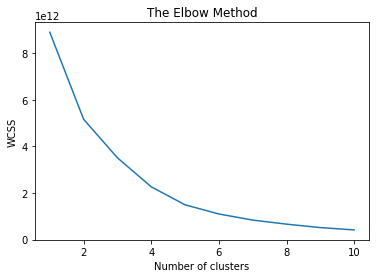

In [33]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(df_cluster)

### Cargo la predicción en una nueva columna del Dataframe original

In [36]:
df_ventas['kmean'] = y_kmeans
df_ventas[['NROCTA', 'PRECIO', 'kmean']]

,NROCTA,PRECIO,kmean
0,I00794,6802.29,0
1,I00631,157.00,0
2,I01101,1310.52,0
3,I01101,449.50,0
4,I01101,739.94,0
...,...,...,...
127913,I01010,4140.00,0
127914,I01010,26342.81,1
127915,I01010,17601.88,1
127916,I01010,19234.58,1
